In [48]:
import pandas as pd 
import numpy as np 
import string
import spacy 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import imread
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk import tokenize
from nltk.tokenize import word_tokenize

In [10]:
data=pd.read_csv('dressreviews.csv')
data

,Review
0,Absolutely wonderful - silky and sexy and comf...
1,Love this dress! it's sooo pretty. i happene...
2,I had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl..."
4,This shirt is very flattering to all due to th...
...,...
395,I love this dress but it definitely runs big. ...
396,So soft!! such beautiful fabric!! it flows so ...
397,This skirt runs small because of the stitching...
398,I bought this sweater because i love twinkle's...


In [11]:
data=[Review.strip() for Review in data.Review]# inorder to remove the trailing edges

In [12]:
data=[Review for Review in data if Review]# inorder to remove the empty spaces
data 

['Absolutely wonderful - silky and sexy and comfortable',
 'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
 'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
 "I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments

In [14]:
data_join=" ".join(data)
data_join

'Absolutely wonderful - silky and sexy and comfortable Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite. I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c I love, love, love this jumpsuit. it\'s fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments! This shirt

In [15]:
data_no_pun=data_join.translate(str.maketrans('','',string.punctuation))
data_no_pun

'Absolutely wonderful  silky and sexy and comfortable Love this dress  its sooo pretty  i happened to find it in a store and im glad i did bc i never would have ordered it online bc its petite  i bought a petite and am 58  i love the length on me hits just a little below the knee  would definitely be a true midi on someone who is truly petite I had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could not zip it up i reordered it in petite medium which was just ok overall the top half was comfortable and fit nicely but the bottom half had a very tight under layer and several somewhat cheap net over layers imo a major design flaw was the net over layer sewn directly into the zipper  it c I love love love this jumpsuit its fun flirty and fabulous every time i wear it i get nothing but great compliments This shirt is very flattering to all due to the adju

In [18]:
data_token=word_tokenize(data_no_pun)
print(data_token)

['Absolutely', 'wonderful', 'silky', 'and', 'sexy', 'and', 'comfortable', 'Love', 'this', 'dress', 'its', 'sooo', 'pretty', 'i', 'happened', 'to', 'find', 'it', 'in', 'a', 'store', 'and', 'im', 'glad', 'i', 'did', 'bc', 'i', 'never', 'would', 'have', 'ordered', 'it', 'online', 'bc', 'its', 'petite', 'i', 'bought', 'a', 'petite', 'and', 'am', '58', 'i', 'love', 'the', 'length', 'on', 'me', 'hits', 'just', 'a', 'little', 'below', 'the', 'knee', 'would', 'definitely', 'be', 'a', 'true', 'midi', 'on', 'someone', 'who', 'is', 'truly', 'petite', 'I', 'had', 'such', 'high', 'hopes', 'for', 'this', 'dress', 'and', 'really', 'wanted', 'it', 'to', 'work', 'for', 'me', 'i', 'initially', 'ordered', 'the', 'petite', 'small', 'my', 'usual', 'size', 'but', 'i', 'found', 'this', 'to', 'be', 'outrageously', 'small', 'so', 'small', 'in', 'fact', 'that', 'i', 'could', 'not', 'zip', 'it', 'up', 'i', 'reordered', 'it', 'in', 'petite', 'medium', 'which', 'was', 'just', 'ok', 'overall', 'the', 'top', 'half',

In [22]:
my_stopwords=pd.read_table('stop.txt',header=None)
my_stopwords

,0
0,a
1,a's
2,able
3,about
4,above
...,...
566,yours
567,yourself
568,yourselves
569,z


In [25]:
data_no_stop=[word for word in data_token if not word in my_stopwords]
print(data_no_stop)

['Absolutely', 'wonderful', 'silky', 'and', 'sexy', 'and', 'comfortable', 'Love', 'this', 'dress', 'its', 'sooo', 'pretty', 'i', 'happened', 'to', 'find', 'it', 'in', 'a', 'store', 'and', 'im', 'glad', 'i', 'did', 'bc', 'i', 'never', 'would', 'have', 'ordered', 'it', 'online', 'bc', 'its', 'petite', 'i', 'bought', 'a', 'petite', 'and', 'am', '58', 'i', 'love', 'the', 'length', 'on', 'me', 'hits', 'just', 'a', 'little', 'below', 'the', 'knee', 'would', 'definitely', 'be', 'a', 'true', 'midi', 'on', 'someone', 'who', 'is', 'truly', 'petite', 'I', 'had', 'such', 'high', 'hopes', 'for', 'this', 'dress', 'and', 'really', 'wanted', 'it', 'to', 'work', 'for', 'me', 'i', 'initially', 'ordered', 'the', 'petite', 'small', 'my', 'usual', 'size', 'but', 'i', 'found', 'this', 'to', 'be', 'outrageously', 'small', 'so', 'small', 'in', 'fact', 'that', 'i', 'could', 'not', 'zip', 'it', 'up', 'i', 'reordered', 'it', 'in', 'petite', 'medium', 'which', 'was', 'just', 'ok', 'overall', 'the', 'top', 'half',

In [26]:
nlp=spacy.load('en_core_web_sm')

In [30]:
data_doc=nlp(" ".join(data_no_stop))
data_doc

Absolutely wonderful silky and sexy and comfortable Love this dress its sooo pretty i happened to find it in a store and im glad i did bc i never would have ordered it online bc its petite i bought a petite and am 58 i love the length on me hits just a little below the knee would definitely be a true midi on someone who is truly petite I had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could not zip it up i reordered it in petite medium which was just ok overall the top half was comfortable and fit nicely but the bottom half had a very tight under layer and several somewhat cheap net over layers imo a major design flaw was the net over layer sewn directly into the zipper it c I love love love this jumpsuit its fun flirty and fabulous every time i wear it i get nothing but great compliments This shirt is very flattering to all due to the adjustable f

In [29]:
data_lemas=[token.lemma_ for token in data_doc]
print(data_lemas)

['absolutely', 'wonderful', 'silky', 'and', 'sexy', 'and', 'comfortable', 'Love', 'this', 'dress', 'its', 'sooo', 'pretty', 'I', 'happen', 'to', 'find', 'it', 'in', 'a', 'store', 'and', 'I', 'm', 'glad', 'I', 'do', 'bc', 'I', 'never', 'would', 'have', 'order', 'it', 'online', 'bc', 'its', 'petite', 'I', 'buy', 'a', 'petite', 'and', 'be', '58', 'I', 'love', 'the', 'length', 'on', 'I', 'hit', 'just', 'a', 'little', 'below', 'the', 'knee', 'would', 'definitely', 'be', 'a', 'true', 'midi', 'on', 'someone', 'who', 'be', 'truly', 'petite', 'I', 'have', 'such', 'high', 'hope', 'for', 'this', 'dress', 'and', 'really', 'want', 'it', 'to', 'work', 'for', 'I', 'I', 'initially', 'order', 'the', 'petite', 'small', 'my', 'usual', 'size', 'but', 'I', 'find', 'this', 'to', 'be', 'outrageously', 'small', 'so', 'small', 'in', 'fact', 'that', 'I', 'could', 'not', 'zip', 'it', 'up', 'I', 'reorder', 'it', 'in', 'petite', 'medium', 'which', 'be', 'just', 'ok', 'overall', 'the', 'top', 'half', 'be', 'comfort

# performing the sentiment analysis

In [31]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn 

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [55]:
sentence=tokenize.sent_tokenize(' '.join(data))
sentence

['Absolutely wonderful - silky and sexy and comfortable Love this dress!',
 "it's sooo pretty.",
 "i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.",
 'i bought a petite and am 5\'8".',
 'i love the length on me- hits just a little below the knee.',
 'would definitely be a true midi on someone who is truly petite.',
 'I had such high hopes for this dress and really wanted it to work for me.',
 'i initially ordered the petite small (my usual size) but i found this to be outrageously small.',
 'so small in fact that i could not zip it up!',
 'i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers.',
 'imo, a major design flaw was the net over layer sewn directly into the zipper - it c I love, love, love this jumpsuit.',
 "it's fun, flirty, and fabulous!",
 'every time i wear it, i get n

In [56]:
sentence_df=pd.DataFrame(sentence,columns=['sentence'])
sentence_df

,sentence
0,Absolutely wonderful - silky and sexy and comf...
1,it's sooo pretty.
2,"i happened to find it in a store, and i'm glad..."
3,"i bought a petite and am 5'8""."
4,i love the length on me- hits just a little be...
...,...
1760,it's super warm and cozy but it's also very he...
1761,"depending on the temp outside, i can wear this..."
1762,but i think the sweater will stretch over time...
1763,Love the look!


In [57]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [58]:
sentiment_lexicon = affinity_scores
def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [59]:
sentence_df['sentiment_value'] = sentence_df['sentence'].apply(calculate_sentiment)
sentence_df

,sentence,sentiment_value
0,Absolutely wonderful - silky and sexy and comf...,9
1,it's sooo pretty.,1
2,"i happened to find it in a store, and i'm glad...",3
3,"i bought a petite and am 5'8"".",0
4,i love the length on me- hits just a little be...,3
...,...,...
1760,it's super warm and cozy but it's also very he...,4
1761,"depending on the temp outside, i can wear this...",0
1762,but i think the sweater will stretch over time...,0
1763,Love the look!,3


In [60]:
sentence_df['word_count'] = sentence_df['sentence'].str.split().apply(len)
sentence_df

,sentence,sentiment_value,word_count
0,Absolutely wonderful - silky and sexy and comf...,9,11
1,it's sooo pretty.,1,3
2,"i happened to find it in a store, and i'm glad...",3,24
3,"i bought a petite and am 5'8"".",0,7
4,i love the length on me- hits just a little be...,3,13
...,...,...,...
1760,it's super warm and cozy but it's also very he...,4,10
1761,"depending on the temp outside, i can wear this...",0,12
1762,but i think the sweater will stretch over time...,0,13
1763,Love the look!,3,3


In [61]:
sentence_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
1106,I was hesitant to purchase this coat because o...,-5,31
33,"also a bit loose for me, but no xxs... so i ke...",-4,29
712,on another note the buckle at the neckline fee...,-4,19
1222,"they are sort of distressed looking, with part...",-4,11
684,it's very low cut..the back is very low..it's ...,-4,20
...,...,...,...
225,"Very comfortable, material is good, cut out on...",11,25
912,because i loved the classic design i decided t...,11,38
1556,I love maeve and was so excited for this top w...,12,20
1636,"plus, the fabric--while thick and beautiful an...",15,37


C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

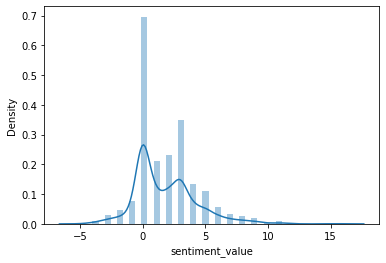

In [62]:
sns.distplot(sentence_df.sentiment_value)

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment_value', ylabel='word_count'>

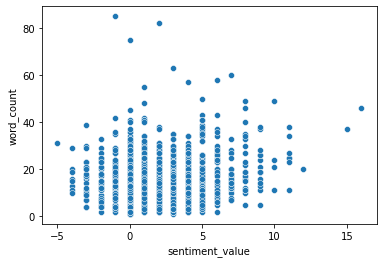

In [63]:
sns.scatterplot(sentence_df.sentiment_value,sentence_df.word_count)